# COCSwap Modeling

We deal with the simple CFMM Case first


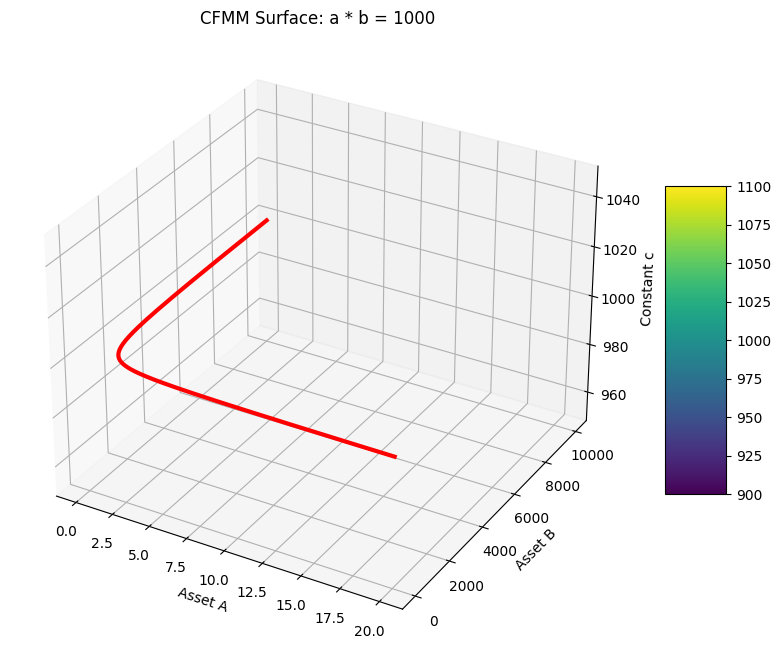

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_cfmm_surface(c, a_range, b_range):
    # Create a meshgrid
    a = np.linspace(a_range[0], a_range[1], 100)
    b = np.linspace(b_range[0], b_range[1], 100)
    A, B = np.meshgrid(a, b)

    # Calculate Z values (the constant c)
    Z = np.full_like(A, c)

    # Create the 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface
    surf = ax.plot_surface(A, B, Z, cmap='viridis')

    # Plot the curve a * b = c
    curve_a = np.linspace(a_range[0], a_range[1], 1000)
    curve_b = c / curve_a
    ax.plot(curve_a, curve_b, c, color='r', lw=3)

    # Set labels and title
    ax.set_xlabel('Asset A')
    ax.set_ylabel('Asset B')
    ax.set_zlabel('Constant c')
    ax.set_title(f'CFMM Surface: a * b = {c}')

    # Add a color bar
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

    plt.show()

# Example usage
c = 1000  # The constant value
a_range = (0.1, 20)  # Range for asset A
b_range = (0.1, 0.11)  # Range for asset B

plot_cfmm_surface(c, a_range, b_range)

Initial state: X = 1000, Y = 1000


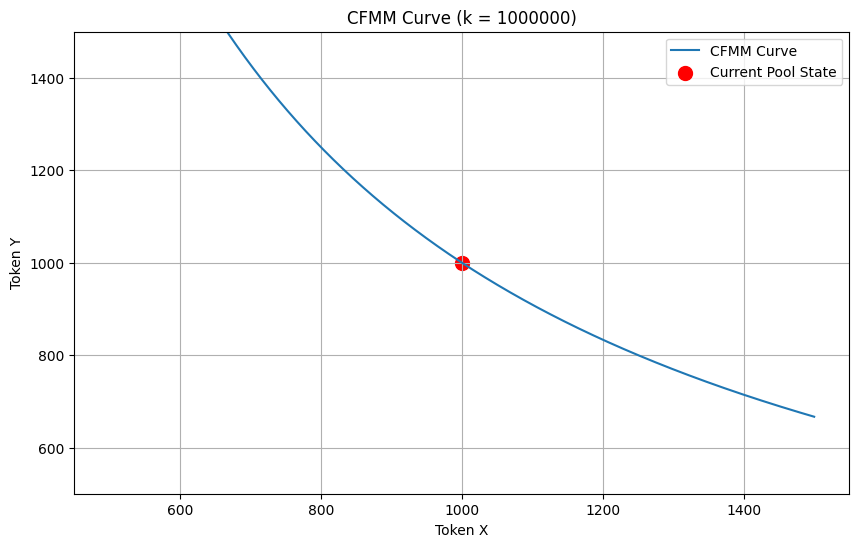

Traded 200 X for 166.67 Y
New state: X = 1200, Y = 833.3333333333334


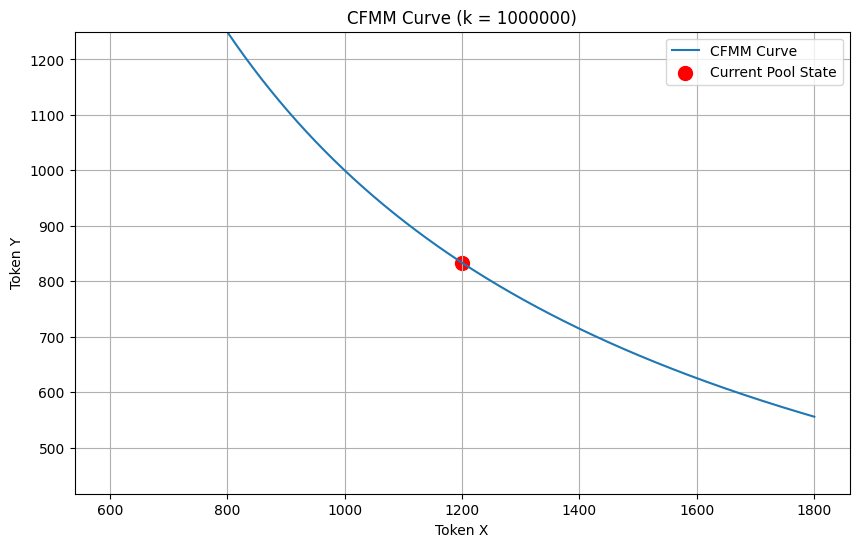

Traded 150 Y for 183.05 X
Final state: X = 1016.9491525423729, Y = 983.3333333333334


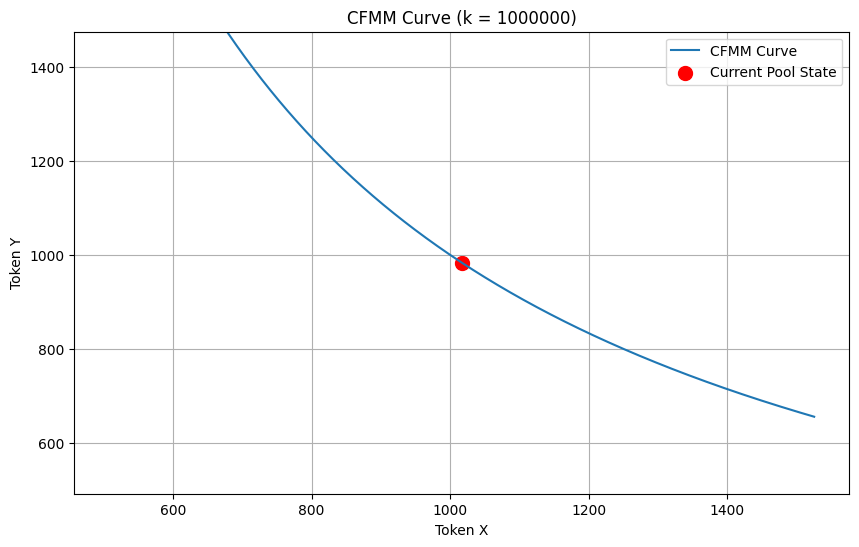

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class CFMMPool:
    def __init__(self, x, y):
        self.x = x  # Amount of token X
        self.y = y  # Amount of token Y
        self.k = x * y  # Constant product

    def trade_x_for_y(self, dx):
        """Simulate trading dx amount of X for Y"""
        if dx <= 0:
            raise ValueError("Amount to trade must be positive")
        if dx >= self.x:
            raise ValueError("Not enough liquidity")

        new_x = self.x + dx
        new_y = self.k / new_x
        dy = self.y - new_y

        self.x = new_x
        self.y = new_y

        return dy

    def trade_y_for_x(self, dy):
        """Simulate trading dy amount of Y for X"""
        if dy <= 0:
            raise ValueError("Amount to trade must be positive")
        if dy >= self.y:
            raise ValueError("Not enough liquidity")

        new_y = self.y + dy
        new_x = self.k / new_y
        dx = self.x - new_x

        self.x = new_x
        self.y = new_y

        return dx

def plot_cfmm_curve(pool, num_points=1000):
    # Calculate the range for x-axis
    x_min = max(0.1, pool.x * 0.5)
    x_max = pool.x * 1.5

    x = np.linspace(x_min, x_max, num_points)
    y = pool.k / x

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='CFMM Curve')
    plt.scatter([pool.x], [pool.y], color='red', s=100, label='Current Pool State')
    plt.xlabel('Token X')
    plt.ylabel('Token Y')
    plt.title(f'CFMM Curve (k = {pool.k})')

    # Set y-axis limits to focus on the relevant part of the curve
    y_min = max(0, pool.y * 0.5)
    y_max = pool.y * 1.5
    plt.ylim(y_min, y_max)

    plt.legend()
    plt.grid(True)
    plt.show()

# Initialize the pool
initial_x = 1000
initial_y = 1000
pool = CFMMPool(initial_x, initial_y)

print(f"Initial state: X = {pool.x}, Y = {pool.y}")

# Plot initial state
plot_cfmm_curve(pool)

# Simulate a trade
trade_amount = 200
received = pool.trade_x_for_y(trade_amount)

print(f"Traded {trade_amount} X for {received:.2f} Y")
print(f"New state: X = {pool.x}, Y = {pool.y}")

# Plot state after trade
plot_cfmm_curve(pool)

# Simulate another trade
trade_amount = 150
received = pool.trade_y_for_x(trade_amount)

print(f"Traded {trade_amount} Y for {received:.2f} X")
print(f"Final state: X = {pool.x}, Y = {pool.y}")

# Plot final state
plot_cfmm_curve(pool)

# Reexpress the CFMM Formula as COC (Square Case)

```
a * b = c
```

Can be represented as

```
minimize

(a - (a0 + delta_a))**2 + (b - (b0 + delta_b)) **2

where

a * b = c
a >= 0
b >= 0

a0 and b0 are the initial conditions for a and b
a0 >= 0
b0 >= 0

delta_a and delta_b represent the change in pool values given
```

In the following visualization we set `delta_b = 0`

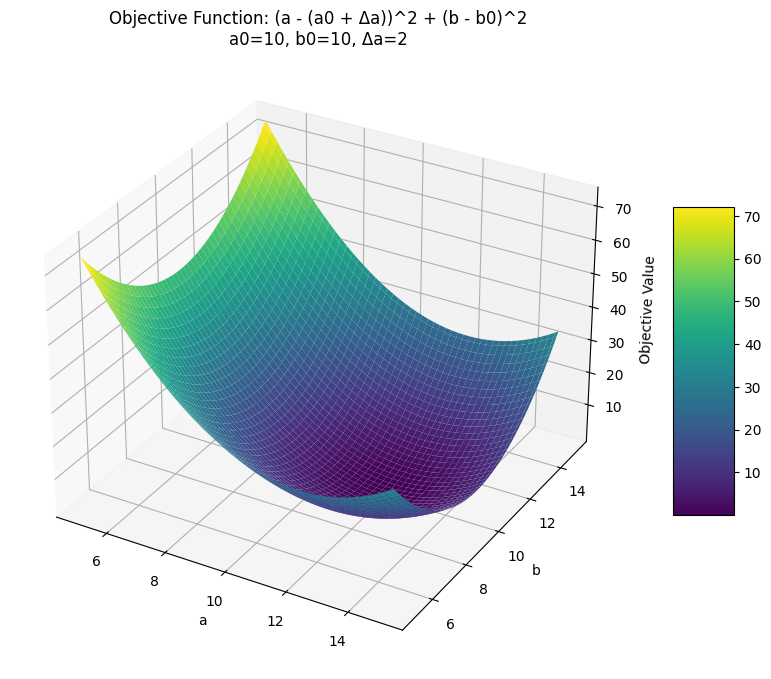

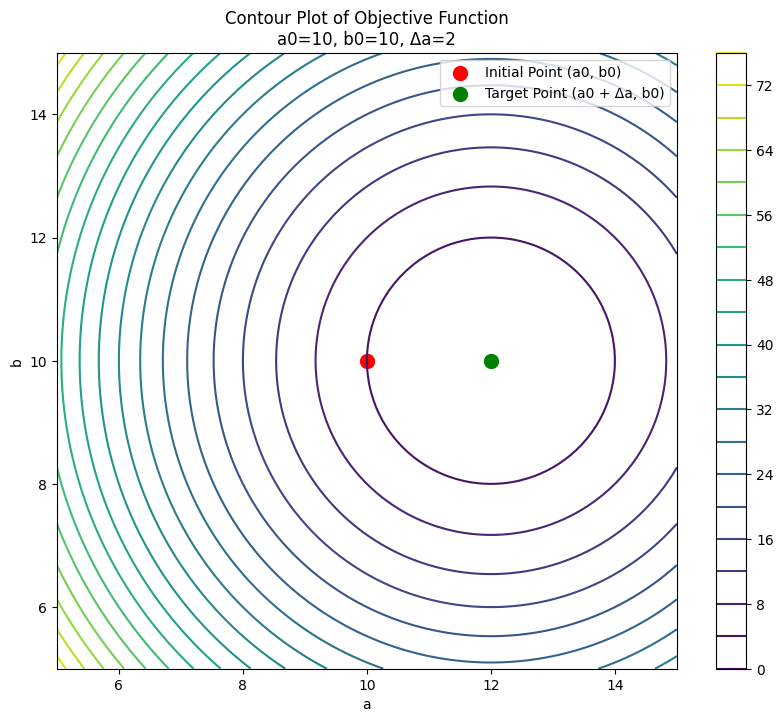

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def objective_function(a, b, a0, b0, delta_a):
    return (a - (a0 + delta_a))**2 + (b - b0)**2

def plot_surface(a0, b0, delta_a, a_range, b_range):
    a = np.linspace(a_range[0], a_range[1], 100)
    b = np.linspace(b_range[0], b_range[1], 100)
    A, B = np.meshgrid(a, b)

    Z = objective_function(A, B, a0, b0, delta_a)

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    surf = ax.plot_surface(A, B, Z, cmap='viridis')

    ax.set_xlabel('a')
    ax.set_ylabel('b')
    ax.set_zlabel('Objective Value')
    ax.set_title(f'Objective Function: (a - (a0 + Δa))^2 + (b - b0)^2\na0={a0}, b0={b0}, Δa={delta_a}')

    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

    plt.show()

def plot_contour(a0, b0, delta_a, a_range, b_range):
    a = np.linspace(a_range[0], a_range[1], 100)
    b = np.linspace(b_range[0], b_range[1], 100)
    A, B = np.meshgrid(a, b)

    Z = objective_function(A, B, a0, b0, delta_a)

    plt.figure(figsize=(10, 8))
    contour = plt.contour(A, B, Z, levels=20)
    plt.colorbar(contour)

    plt.scatter([a0], [b0], color='red', s=100, label='Initial Point (a0, b0)')
    plt.scatter([a0 + delta_a], [b0], color='green', s=100, label='Target Point (a0 + Δa, b0)')

    plt.xlabel('a')
    plt.ylabel('b')
    plt.title(f'Contour Plot of Objective Function\na0={a0}, b0={b0}, Δa={delta_a}')
    plt.legend()

    plt.show()

# Set parameters
a0 = 10
b0 = 10
delta_a = 2

# Set ranges for a and b
a_range = (5, 15)
b_range = (5, 15)

# Generate plots
plot_surface(a0, b0, delta_a, a_range, b_range)
plot_contour(a0, b0, delta_a, a_range, b_range)

Trade 1: 10 of asset A traded
  Before: A = 100.00, B = 100.00
  After:  A = 105.39, B = 94.88

Trade 2: 10 of asset A traded
  Before: A = 105.39, B = 94.88
  After:  A = 111.32, B = 89.83

Trade 3: 10 of asset A traded
  Before: A = 111.32, B = 89.83
  After:  A = 117.77, B = 84.91

Trade 4: 10 of asset A traded
  Before: A = 117.77, B = 84.91
  After:  A = 124.73, B = 80.18

Trade 5: 10 of asset A traded
  Before: A = 124.73, B = 80.18
  After:  A = 132.15, B = 75.67



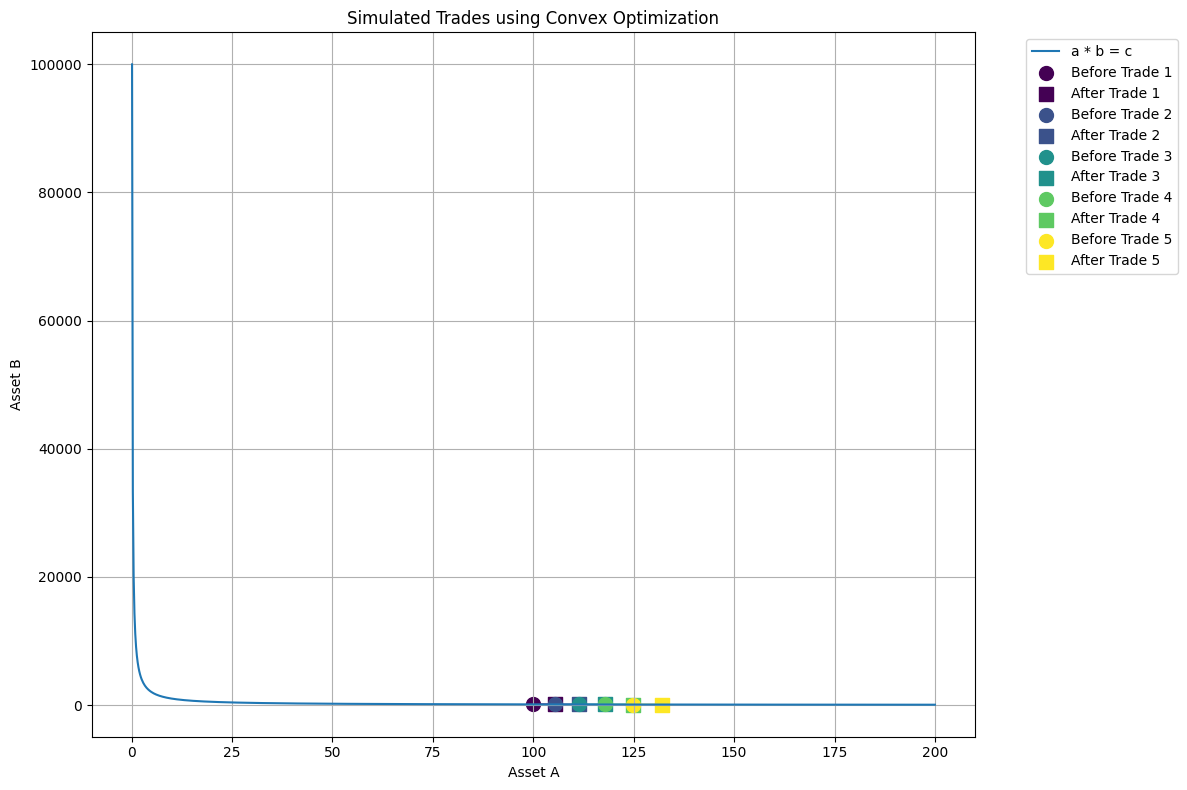

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

class Pool:
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c

    def objective_function(self, x):
        return (x[0] - (self.a + self.delta_a))**2 + (x[1] - self.b)**2

    def constraint(self, x):
        return x[0] * x[1] - self.c

    def optimize(self, delta_a):
        self.delta_a = delta_a
        cons = {'type': 'eq', 'fun': self.constraint}
        bounds = ((0, None), (0, None))
        res = minimize(self.objective_function, [self.a, self.b], method='SLSQP', constraints=cons, bounds=bounds)
        return res.x

    def trade(self, delta_a):
        new_a, new_b = self.optimize(delta_a)
        self.a, self.b = new_a, new_b

def plot_trade(pool, trade_amount, num_trades=5):
    plt.figure(figsize=(12, 8))

    # Plot the curve a * b = c
    x = np.linspace(0.1, pool.a * 2, 1000)
    y = pool.c / x
    plt.plot(x, y, label='a * b = c')

    colors = plt.cm.viridis(np.linspace(0, 1, num_trades))

    for i in range(num_trades):
        a_before, b_before = pool.a, pool.b
        pool.trade(trade_amount)
        a_after, b_after = pool.a, pool.b

        plt.scatter([a_before], [b_before], color=colors[i], s=100, label=f'Before Trade {i+1}')
        plt.scatter([a_after], [b_after], color=colors[i], s=100, marker='s', label=f'After Trade {i+1}')
        plt.arrow(a_before, b_before, a_after - a_before, b_after - b_before, color=colors[i], width=0.0005, head_width=0.15)

        print(f"Trade {i+1}: {trade_amount} of asset A traded")
        print(f"  Before: A = {a_before:.2f}, B = {b_before:.2f}")
        print(f"  After:  A = {a_after:.2f}, B = {b_after:.2f}")
        print()

    plt.xlabel('Asset A')
    plt.ylabel('Asset B')
    plt.title('Simulated Trades using Convex Optimization')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.grid(True)
    plt.show()

# Initialize the pool
initial_a = 100
initial_b = 100
c = initial_a * initial_b
pool = Pool(initial_a, initial_b, c)

# Simulate trades
# TODO: Find a scaling function, because delta_a = 10 won't result in a decrease in 10 tokens
trade_amount = 10
plot_trade(pool, trade_amount)

# Reexpress the CFMM Formula as COC (Linear Case)

We use constant sum in the linear case
```
a + b = c
```

Can be represented as

```
minimize

(a - (a0 + delta_a)) + (b - (b0 + delta_b))

where

a + b = c
a >= 0
b >= 0

a0 and b0 are the initial conditions for a and b
a0 >= 0
b0 >= 0

delta_a and delta_b represent the change in pool values given
```

In the following visualization we set `delta_b = 0`

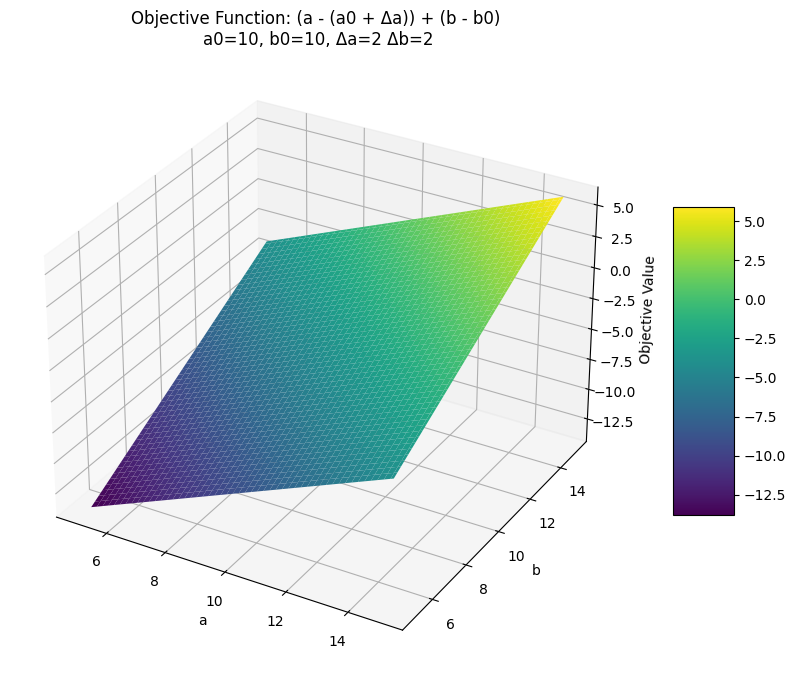

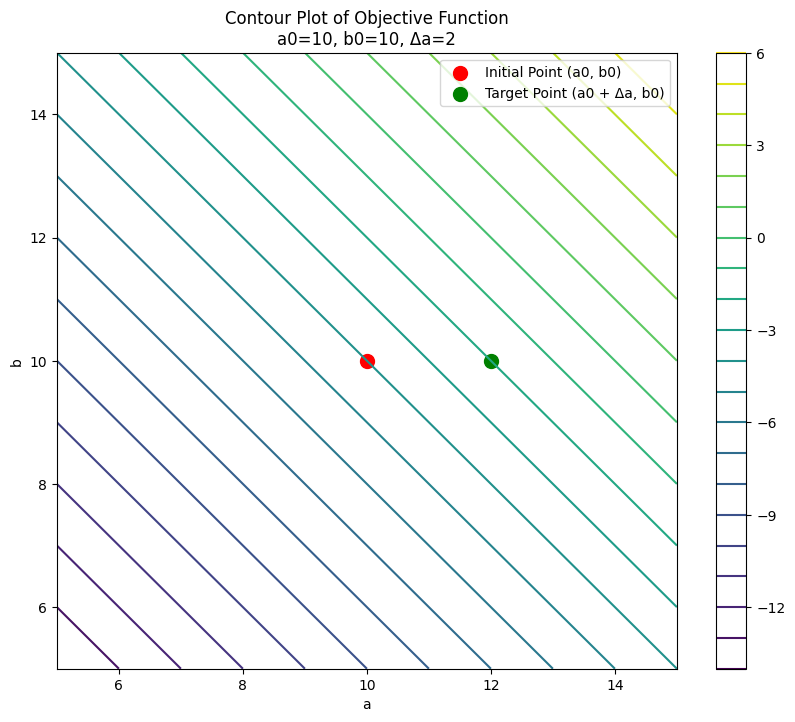

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def objective_function(a, b, a0, b0, delta_a, delta_b):
    return (a - (a0 + delta_a)) + (b - (b0 + delta_b))

def plot_surface(a0, b0, delta_a, delta_b, a_range, b_range):
    a = np.linspace(a_range[0], a_range[1], 100)
    b = np.linspace(b_range[0], b_range[1], 100)
    A, B = np.meshgrid(a, b)

    Z = objective_function(A, B, a0, b0, delta_a, delta_b)

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    surf = ax.plot_surface(A, B, Z, cmap='viridis')

    ax.set_xlabel('a')
    ax.set_ylabel('b')
    ax.set_zlabel('Objective Value')
    ax.set_title(f'Objective Function: (a - (a0 + Δa)) + (b - b0) \na0={a0}, b0={b0}, Δa={delta_a} Δb={delta_b}')

    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

    plt.show()

def plot_contour(a0, b0, delta_a, delta_b, a_range, b_range):
    a = np.linspace(a_range[0], a_range[1], 100)
    b = np.linspace(b_range[0], b_range[1], 100)
    A, B = np.meshgrid(a, b)

    Z = objective_function(A, B, a0, b0, delta_a, delta_b)

    plt.figure(figsize=(10, 8))
    contour = plt.contour(A, B, Z, levels=20)
    plt.colorbar(contour)

    plt.scatter([a0], [b0], color='red', s=100, label='Initial Point (a0, b0)')
    plt.scatter([a0 + delta_a], [b0], color='green', s=100, label='Target Point (a0 + Δa, b0)')

    plt.xlabel('a')
    plt.ylabel('b')
    plt.title(f'Contour Plot of Objective Function\na0={a0}, b0={b0}, Δa={delta_a}')
    plt.legend()

    plt.show()

# Set parameters
a0 = 10
b0 = 10
delta_a = 2
delta_b = 2


# Set ranges for a and b
a_range = (5, 15)
b_range = (5, 15)

# Generate plots
plot_surface(a0, b0, delta_a, delta_b, a_range, b_range)
plot_contour(a0, b0, delta_a, delta_b, a_range, b_range)

Trade 1: 10 of asset A traded
  Before: A = 100.00, B = 100.00
  After:  A = 0.00, B = 35351454435825376.00

Trade 2: 10 of asset A traded
  Before: A = 0.00, B = 35351454435825376.00
  After:  A = 0.00, B = 720567999978016512.00

Trade 3: 10 of asset A traded
  Before: A = 0.00, B = 720567999978016512.00
  After:  A = 0.00, B = 4439352695787953121192774205440.00

Trade 4: 10 of asset A traded
  Before: A = 0.00, B = 4439352695787953121192774205440.00
  After:  A = 0.00, B = 75493626248202465481060924784640.00

Trade 5: 10 of asset A traded
  Before: A = 0.00, B = 75493626248202465481060924784640.00
  After:  A = 0.00, B = 146547899824211411724016862363648.00



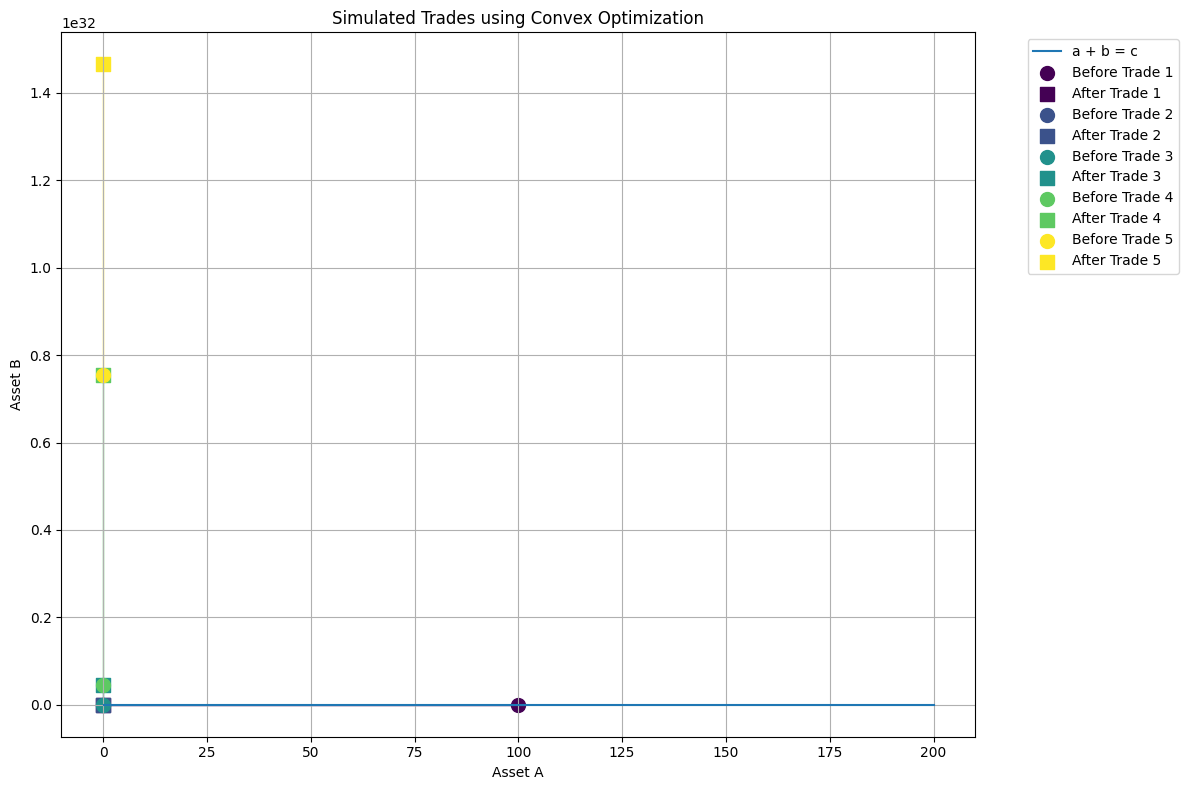

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

class Pool:
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = a*b

    def objective_function(self, x):
        return (x[0] - (self.a + self.delta_a)) * (x[1] - (self.b + self.delta_b))

    def constraint(self, x):
        return x[0] * x[1] - self.c

    def optimize(self, delta_a):
        self.delta_a = delta_a
        cons = {'type': 'eq', 'fun': self.constraint}
        bounds = ((0, None), (0, None))
        res = minimize(self.objective_function, [self.a, self.b], method='SLSQP', constraints=cons, bounds=bounds)
        return res.x

    def trade(self, delta_a):
        new_a, new_b = self.optimize(delta_a)
        self.a, self.b = new_a, new_b

def plot_trade(pool, trade_amount, num_trades=5):
    plt.figure(figsize=(12, 8))

    # Plot the curve a * b = c
    x = np.linspace(0.1, pool.a * 2, 1000)
    y = pool.c / x
    plt.plot(x, y, label='a + b = c')

    colors = plt.cm.viridis(np.linspace(0, 1, num_trades))

    for i in range(num_trades):
        a_before, b_before = pool.a, pool.b
        pool.trade(trade_amount)
        a_after, b_after = pool.a, pool.b

        plt.scatter([a_before], [b_before], color=colors[i], s=100, label=f'Before Trade {i+1}')
        plt.scatter([a_after], [b_after], color=colors[i], s=100, marker='s', label=f'After Trade {i+1}')
        plt.arrow(a_before, b_before, a_after - a_before, b_after - b_before, color=colors[i], width=0.0005, head_width=0.15)

        print(f"Trade {i+1}: {trade_amount} of asset A traded")
        print(f"  Before: A = {a_before:.2f}, B = {b_before:.2f}")
        print(f"  After:  A = {a_after:.2f}, B = {b_after:.2f}")
        print()

    plt.xlabel('Asset A')
    plt.ylabel('Asset B')
    plt.title('Simulated Trades using Convex Optimization')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.grid(True)
    plt.show()

# Initialize the pool
initial_a = 100
initial_b = 100
c = initial_a + initial_b
pool = Pool(initial_a, initial_b, c)

# Simulate trades
trade_amount = 10
plot_trade(pool, trade_amount)

# Reformulate with PyTorch and export as ONNX for ezkl

In [6]:
!pip install onnx ezkl==13.0.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 15.7 MB/s eta 0:00:00
  Attempting uninstall: ezkl
    Found existing installation: ezkl 100.100.101
    Uninstalling ezkl-100.100.101:
      Successfully uninstalled ezkl-100.100.101


In [30]:
import torch
import torch.nn as nn
import json

class DynamicSelfOptimizingModel(nn.Module):
    def __init__(self, num_iterations=100, learning_rate=0.01):
        super(DynamicSelfOptimizingModel, self).__init__()
        self.num_iterations = num_iterations
        self.learning_rate = learning_rate

    def forward(self, inputs):
        # Reshape inputs: [batch_size, 5] -> [batch_size, a0, b0, delta_a, delta_b, c]
        a0, b0, delta_a, delta_b, c = inputs.unbind(dim=1)

        # Initialize a and b
        a = a0.clone()
        b = b0.clone()

        # Optimization loop
        for _ in range(self.num_iterations):
            # Compute the objective
            objective = (a - (a0 + delta_a))**2 + (b - (b0 + delta_b))**2

            # Compute the constraint
            constraint = torch.abs(a * b - c)

            # Total loss
            loss = objective + 1000 * constraint

            # Compute gradients manually
            grad_a = 2 * (a - (a0 + delta_a)) + 1000 * b * torch.sign(a * b - c)
            grad_b = 2 * (b - (b0 + delta_b)) + 1000 * a * torch.sign(a * b - c)

            # Update a and b
            a = a - self.learning_rate * grad_a
            b = b - self.learning_rate * grad_b

            # Project onto the feasible set (ensure a >= 0 and b >= 0)
            a = torch.clamp(a, min=0)
            b = torch.clamp(b, min=0)

        return a, b

# Create model instance
model = DynamicSelfOptimizingModel()

# Generate sample input
batch_size = 1
shape = (5,)  # Each input is a 5-dimensional vector
x = torch.rand(batch_size, *shape)

# Run the model with sample input
with torch.no_grad():
    torch_out = model(x)

# Export to ONNX
torch.onnx.export(model,
                  x,
                  "cocswap.onnx",
                  export_params=True,
                  opset_version=11,
                  do_constant_folding=True,
                  input_names=['input'],
                  output_names=['final_a', 'final_b'],
                  dynamic_axes={'input': {0: 'batch_size'},
                                'final_a': {0: 'batch_size'},
                                'final_b': {0: 'batch_size'}})

print("Model exported to cocswap.onnx")

# Verify the exported model
import onnx
onnx_model = onnx.load("cocswap.onnx")
onnx.checker.check_model(onnx_model)
print("ONNX model checked successfully")

# Prepare input data for JSON
d = x.detach().numpy().reshape([-1]).tolist()

# Prepare output data for JSON
output_data = [o.detach().numpy().reshape([-1]).tolist() for o in torch_out]

# Create data dictionary
data = {
    "input_shapes": [list(shape)],
    "input_data": [d],
    "output_data": output_data
}

# Save input data to JSON file
with open("input.json", 'w') as f:
    json.dump(data, f)

print("Sample input and output saved to input.json")

Model exported to cocswap.onnx
ONNX model checked successfully
Sample input and output saved to input.json


In [31]:
# path variables
import os
import ezkl

model_path = os.path.join('cocswap.onnx')
compiled_model_path = os.path.join('network.compiled')
pk_path = os.path.join('test.pk')
vk_path = os.path.join('test.vk')
settings_path = os.path.join('settings.json')

witness_path = os.path.join('witness.json')
data_path = os.path.join('input.json')

pyargs = ezkl.PyRunArgs()
pyargs.input_visibility = "public"
pyargs.output_visibility= "public"

res = ezkl.gen_settings(model_path, settings_path, py_run_args=pyargs)

print("Settings saved to settings.json")

Settings saved to settings.json


In [32]:
# Create calibration dataset
cal_path = os.path.join("calibration.json")

# Generate 20 random samples
data_array = (torch.randn(20, *shape).detach().numpy()).reshape([-1]).tolist()

# Create calibration data dictionary
calibration_data = dict(input_data=[data_array])

# Save calibration data to calibration.json file
with open(cal_path, 'w') as f:
    json.dump(calibration_data, f)

print("Calibration dataset saved to calibration.json")

Calibration dataset saved to calibration.json


In [33]:
res = await ezkl.calibrate_settings(data_path, model_path, settings_path, "resources")
assert res == True

ERROR:ezkl.graph.model:value (-53438638232309530432202024204395085824) out of range: (-8388608, 8388608)
ERROR:ezkl.execute:forward pass failed: "failed to forward: [halo2] General synthesis error"
ERROR:ezkl.graph.model:value (-53438638232309525709835541334749872128) out of range: (-8388608, 8388608)
ERROR:ezkl.execute:forward pass failed: "failed to forward: [halo2] General synthesis error"
ERROR:ezkl.graph.model:value (-53438638232309525709835541334749872128) out of range: (-8388608, 8388608)
ERROR:ezkl.execute:forward pass failed: "failed to forward: [halo2] General synthesis error"
ERROR:ezkl.graph.model:value (-53438638232309530432202024204395085824) out of range: (-8388608, 8388608)
ERROR:ezkl.execute:forward pass failed: "failed to forward: [halo2] General synthesis error"
ERROR:ezkl.graph.model:value (-53438638232309525709835541334749872128) out of range: (-8388608, 8388608)
ERROR:ezkl.execute:forward pass failed: "failed to forward: [halo2] General synthesis error"
ERROR:ezkl

In [34]:
res = ezkl.compile_circuit(model_path, compiled_model_path, settings_path)
assert res == True

In [35]:
res = await ezkl.get_srs(settings_path)


In [36]:
res = await ezkl.gen_witness(data_path, compiled_model_path, witness_path)
assert os.path.isfile(witness_path)

In [37]:
res = ezkl.setup(
        compiled_model_path,
        vk_path,
        pk_path,

    )

assert res == True
assert os.path.isfile(vk_path)
assert os.path.isfile(pk_path)
assert os.path.isfile(settings_path)

In [38]:
proof_path = os.path.join('test.pf')

res = ezkl.prove(
        witness_path,
        compiled_model_path,
        pk_path,
        proof_path,

        "single",
    )

print(res)
assert os.path.isfile(proof_path)

{'instances': [['c406000000000000000000000000000000000000000000000000000000000000', '7602000000000000000000000000000000000000000000000000000000000000', '0702000000000000000000000000000000000000000000000000000000000000', '1f03000000000000000000000000000000000000000000000000000000000000', '8105000000000000000000000000000000000000000000000000000000000000', '6901000000000000000000000000000000000000000000000000000000000000', 'e501000000000000000000000000000000000000000000000000000000000000']], 'proof': '0x2a04aa977cef8dabe835aca30aec38f13b7336db44b7410f4cc15d389032093028d8bc7bb830f7c98601818c2d5a8b177b79f6bc953b5d00ebbd5b58ee2f4afd0f8b3accc727dab84dd848a6ca38ef4ee9575809440f407132462eeecc5cdbbd11efb5a6154dc4e020c1788e6086e8626f0b4174a0369f59bb9d82ecee708c352db782c80de2cb987abe24cd817e72e103d0b788d2713aebc80355f3a22ca26b105892ed9ef7259d2d1d4360f32eb9d6c6ef117a6e4bfc7af75b8f49688cf1880436894b9084eef002ee9cfe78b307c92fcda503af9c8b9bb31ea23bfef2d80a15d4941a8ee9d3ce336037df2248f4d25ab5dd04b4df7e